In [1]:
import numpy as np
import pandas as pd
import nbimporter

import analyze_control as ac

import exp_study_case

Importing Jupyter notebook from exp_study_case.ipynb


In [2]:
hday, cday = exp_study_case.get_display_day()

In [3]:
# ダクト断熱あり, VAVなし
d6 = ac.get_main_value(6)
d6t = d6['time_value']
df6t = pd.DataFrame(d6t)
# ダクト断熱なし, VAVなし
d52 = ac.get_main_value(52)
d52t = d52['time_value']
df52t = pd.DataFrame(d52t)
# ダクト断熱あり, VAVあり
d55 = ac.get_main_value(55)
d55t = d52['time_value']
df55t = pd.DataFrame(d52t)

## 居室の負荷

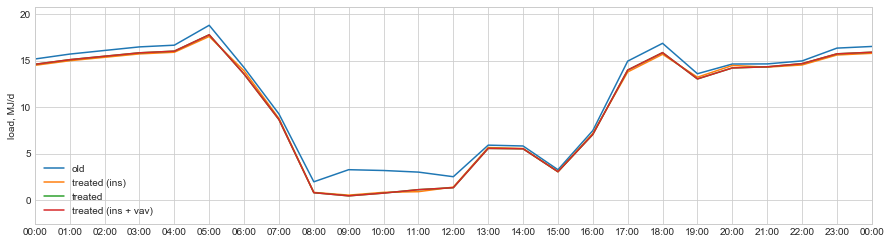

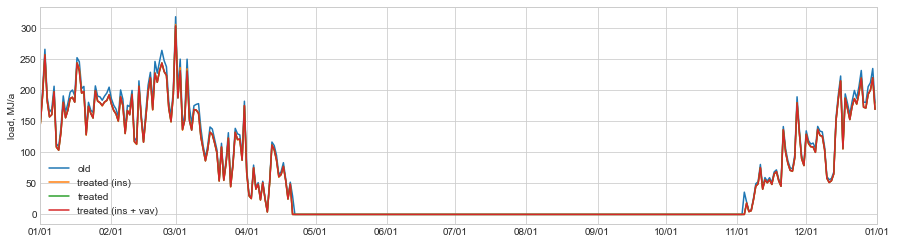

In [25]:
data = [
    (df6t.old_heating_load_sum_of_occupant_rooms, 'old'),
    (df6t.actual_treated_heating_load_all
     - df6t.actual_heat_loss_through_partitions_heating_all, 'treated (ins)'),
    (df52t.actual_treated_heating_load_all
     - df52t.actual_heat_loss_through_partitions_heating_all, 'treated'),
    (df55t.actual_treated_heating_load_all
     - df55t.actual_heat_loss_through_partitions_heating_all, 'treated (ins + vav)'),
]
ac.draw_graph('load, MJ/d', data, op='raw', display_date=hday)
ac.draw_graph('load, MJ/a', data, op='itg')

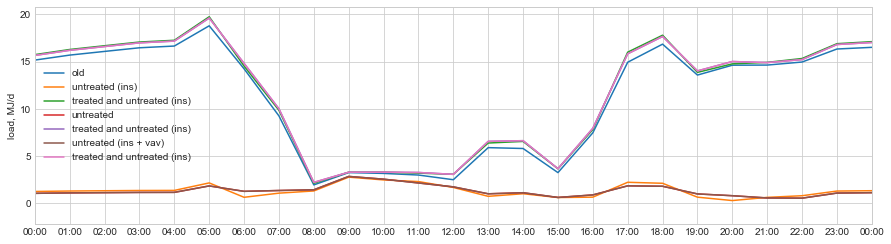

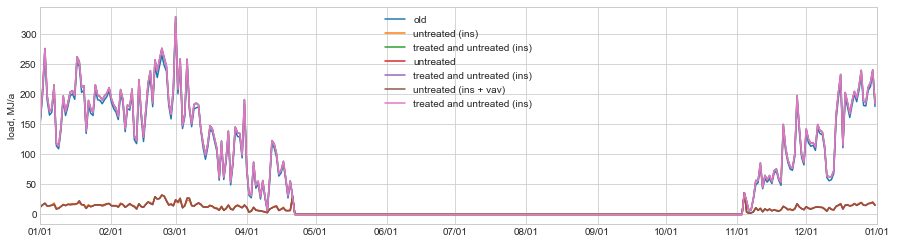

In [26]:
data = [
    (df6t.old_heating_load_sum_of_occupant_rooms, 'old'),
    (df6t.untreated_heating_load_all, 'untreated (ins)'),
    (df6t.actual_treated_heating_load_all
     - df6t.actual_heat_loss_through_partitions_heating_all
     + df6t.untreated_heating_load_all, 'treated and untreated (ins)'),
    (df52t.untreated_heating_load_all, 'untreated'),
    (df52t.actual_treated_heating_load_all
     - df52t.actual_heat_loss_through_partitions_heating_all
     + df52t.untreated_heating_load_all, 'treated and untreated (ins)'),
    (df55t.untreated_heating_load_all, 'untreated (ins + vav)'),
    (df55t.actual_treated_heating_load_all
     - df55t.actual_heat_loss_through_partitions_heating_all
     + df55t.untreated_heating_load_all, 'treated and untreated (ins)'),
]
ac.draw_graph('load, MJ/d', data, op='raw', display_date=hday)
ac.draw_graph('load, MJ/a', data, op='itg')

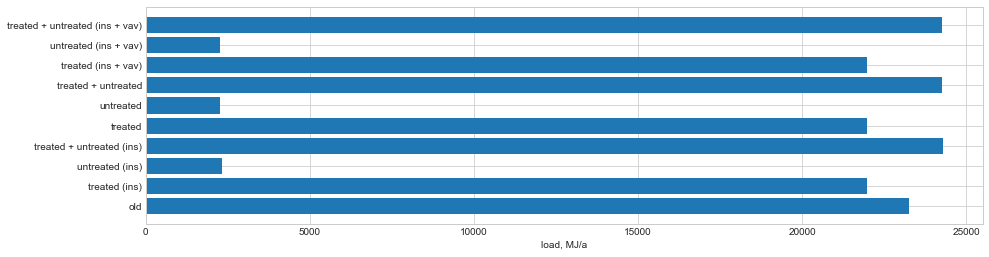

In [16]:
data = [
    (df6t.old_heating_load_sum_of_occupant_rooms, 'old'),
    (df6t.actual_treated_heating_load_all
     - df6t.actual_heat_loss_through_partitions_heating_all, 'treated (ins)'),
    (df6t.untreated_heating_load_all, 'untreated (ins)'),
    (df6t.actual_treated_heating_load_all
     - df6t.actual_heat_loss_through_partitions_heating_all
     + df6t.untreated_heating_load_all, 'treated + untreated (ins)'),
    (df52t.actual_treated_heating_load_all
     - df52t.actual_heat_loss_through_partitions_heating_all, 'treated'),
    (df52t.untreated_heating_load_all, 'untreated'),
    (df52t.actual_treated_heating_load_all
     - df52t.actual_heat_loss_through_partitions_heating_all
     + df52t.untreated_heating_load_all, 'treated + untreated'),
    (df55t.actual_treated_heating_load_all
     - df55t.actual_heat_loss_through_partitions_heating_all, 'treated (ins + vav)'),
    (df55t.untreated_heating_load_all, 'untreated (ins + vav)'),
    (df55t.actual_treated_heating_load_all
     - df55t.actual_heat_loss_through_partitions_heating_all
     + df55t.untreated_heating_load_all, 'treated + untreated (ins + vav)'),
]
ac.draw_sum_bar_graph('load, MJ/a', data)

## 処理熱量

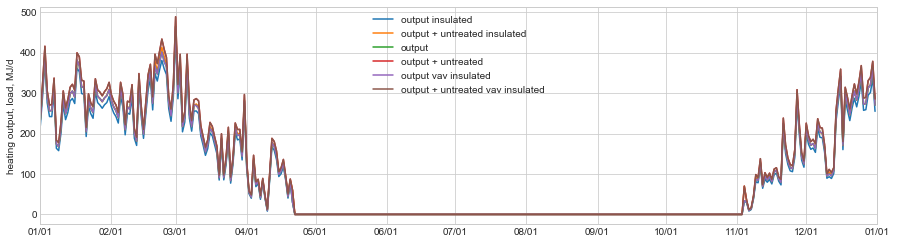

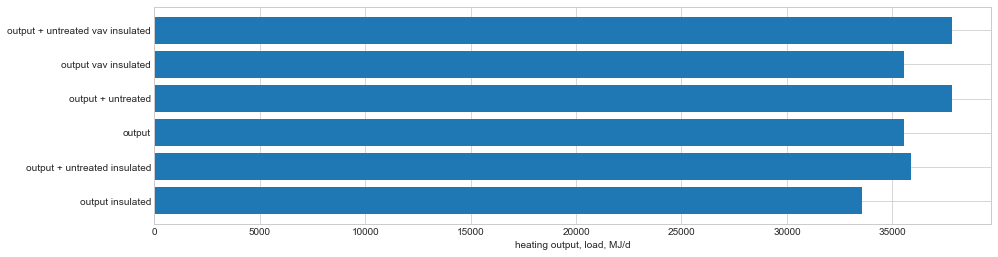

In [5]:
data = [
    (df6t.output_of_heat_source_heating, 'output insulated'),
    (df6t.output_of_heat_source_heating + df6t.untreated_heating_load_all, 'output + untreated insulated'),
    (df52t.output_of_heat_source_heating, 'output'),
    (df52t.output_of_heat_source_heating + df52t.untreated_heating_load_all, 'output + untreated'),
    (df55t.output_of_heat_source_heating, 'output vav insulated'),
    (df55t.output_of_heat_source_heating + df55t.untreated_heating_load_all, 'output + untreated vav insulated'),
]

ac.draw_graph('heating output, load, MJ/d', data, op='itg')
ac.draw_sum_bar_graph('heating output, load, MJ/d', data)

# 従来の計算方法との比較

#### 暖房

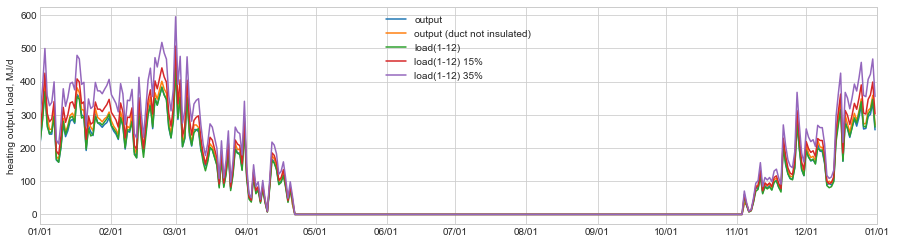

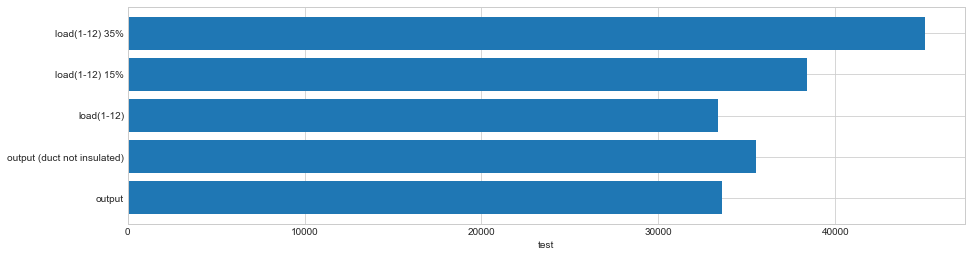

In [6]:
data = [
    (df6t.output_of_heat_source_heating, 'output'),
    (df52t.output_of_heat_source_heating, 'output (duct not insulated)'),
    (df6t.old_heating_load_sum_of_12_rooms, 'load(1-12)'),
    (df6t.old_heating_load_sum_of_12_rooms * 1.15, 'load(1-12) 15%'),
    (df6t.old_heating_load_sum_of_12_rooms * 1.35, 'load(1-12) 35%'),
]

ac.draw_graph('heating output, load, MJ/d', data, op='itg')
ac.draw_sum_bar_graph('test',data)

#### 冷房顕熱

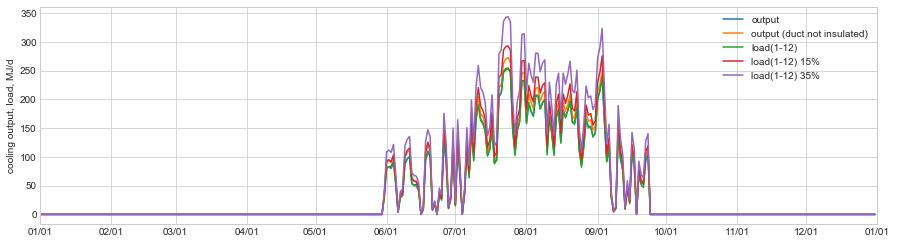

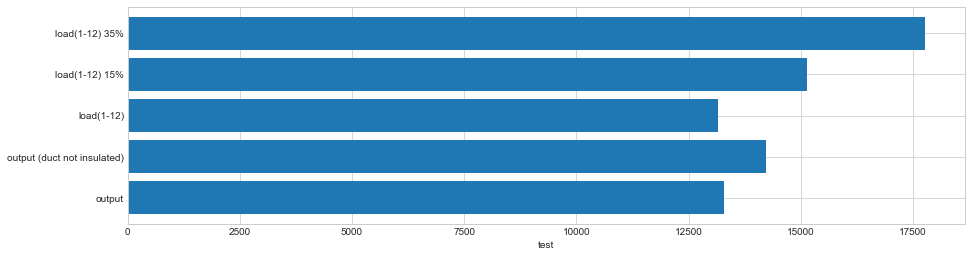

In [7]:
data = [
    (df6t.output_of_heat_source_sensible_cooling, 'output'),
    (df52t.output_of_heat_source_sensible_cooling, 'output (duct not insulated)'),
    (df6t.old_sensible_cooling_load_sum_of_12_rooms, 'load(1-12)'),
    (df6t.old_sensible_cooling_load_sum_of_12_rooms * 1.15, 'load(1-12) 15%'),
    (df6t.old_sensible_cooling_load_sum_of_12_rooms * 1.35, 'load(1-12) 35%')
]

ac.draw_graph('cooling output, load, MJ/d', data, op='itg')
ac.draw_sum_bar_graph('test',data)

#### 冷房潜熱

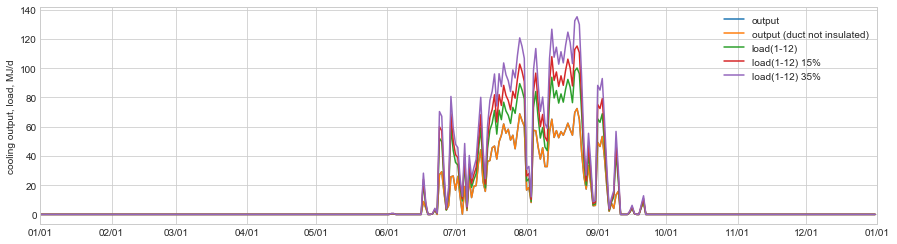

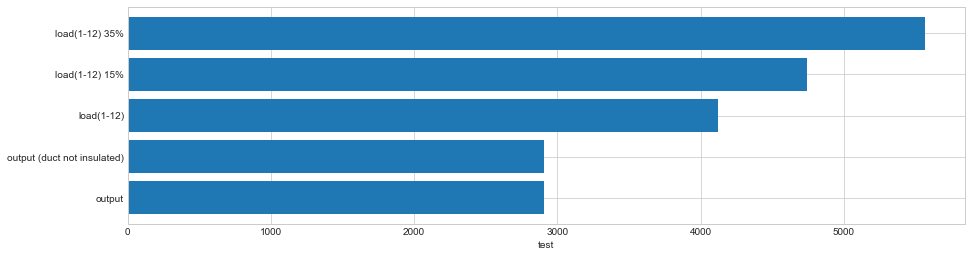

In [8]:
data = [
    (df6t.output_of_heat_source_latent_cooling, 'output'),
    (df52t.output_of_heat_source_latent_cooling, 'output (duct not insulated)'),
    (df6t.old_latent_cooling_load_sum_of_12_rooms, 'load(1-12)'),
    (df6t.old_latent_cooling_load_sum_of_12_rooms * 1.15, 'load(1-12) 15%'),
    (df6t.old_latent_cooling_load_sum_of_12_rooms * 1.35, 'load(1-12) 35%'),
]

ac.draw_graph('cooling output, load, MJ/d', data, op='itg')
ac.draw_sum_bar_graph('test',data)

In [9]:
heating_load_room_total = df6t.heating_load_room1 \
                        + df6t.heating_load_room2 \
                        + df6t.heating_load_room3 \
                        + df6t.heating_load_room4 \
                        + df6t.heating_load_room5

heat_loss_through_partition_for_heating_total = df6t.heat_loss_through_partition_heating_room1 \
                                              + df6t.heat_loss_through_partition_heating_room2 \
                                              + df6t.heat_loss_through_partition_heating_room3 \
                                              + df6t.heat_loss_through_partition_heating_room4 \
                                              + df6t.heat_loss_through_partition_heating_room5

duct_heat_loss_heating_total = df6t.duct_heat_loss_heating_room1 \
                             + df6t.duct_heat_loss_heating_room2 \
                             + df6t.duct_heat_loss_heating_room3 \
                             + df6t.duct_heat_loss_heating_room4 \
                             + df6t.duct_heat_loss_heating_room5

data = [
    (heating_load_room_total, 'occupant envelope room load'),
    (heating_load_room_total + heat_loss_through_partition_for_heating_total, 'occupant room load'),
    (heating_load_room_total + df6t.non_occupant_room_load, 'total room load'),
    (heating_load_room_total + df6t.non_occupant_room_load + duct_heat_loss_heating_total, 'total room load + duct heat loss'),
    (df6t.output_of_heat_source_heating, 'output'),
    (df6t.old_heating_load_sum_of_12_rooms, 'load(1-12)')
]

ac.draw_graph('heating output, load, MJ/d', data, op='itg')

AttributeError: 'DataFrame' object has no attribute 'non_occupant_room_load'

In [ ]:
actual_treated_load_for_heating = df6t.actual_treated_load_heating_room1 \
                                + df6t.actual_treated_load_heating_room2 \
                                + df6t.actual_treated_load_heating_room3 \
                                + df6t.actual_treated_load_heating_room4 \
                                + df6t.actual_treated_load_heating_room5

data = [
    (heating_load_room_total + duct_heat_loss_heating_total, 'load(1-5)'),
    (actual_treated_load_for_heating, 'treated'),
]

ac.draw_graph('heating output, load, MJ/d', data, op='itg')